In [2]:
from sklearn.metrics import accuracy_score, log_loss
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
dt_x = list()
dt_y = list()
best_depth = 0
best_acc = 0

In [4]:
def encode(train, test):
    le = LabelEncoder().fit(train.label)
    labels = le.transform(train.label)  # encode label
    classes = list(le.classes_)  # save column names for submission
    test_ids = test.id  # save test ids for submission
    train = train.drop('id', axis=1)
    train = train.drop('label', axis=1)
    test = test.drop('id', axis=1)
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)


In [5]:
train.head(1)
test.head(1)
test=np.array(test)

In [6]:
sss = StratifiedShuffleSplit(n_splits=7, test_size=0.2)
sss.get_n_splits(train, labels)
for train_index, test_index in sss.split(train, labels):
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [7]:
#for loop to compare decision trees from depth=2 to 10
for i in range(2, 11):
    dt = DecisionTreeClassifier(max_depth=i, criterion='entropy')
    dt.fit(X_train, y_train)
    predict = dt.predict(X_train)
    answer = sklearn.metrics.accuracy_score(y_train, predict) * 100
    if answer > best_acc:
        best_acc = answer
        best_depth = i
    print('Accuracy of decision tree for max depth:', i, 'is:', answer, '%')
    dt_x.append(i)
    dt_y.append(answer)

Accuracy of decision tree for max depth: 2 is: 28.26388888888889 %
Accuracy of decision tree for max depth: 3 is: 32.10069444444444 %
Accuracy of decision tree for max depth: 4 is: 33.81944444444444 %
Accuracy of decision tree for max depth: 5 is: 36.28472222222222 %
Accuracy of decision tree for max depth: 6 is: 39.947916666666664 %
Accuracy of decision tree for max depth: 7 is: 45.520833333333336 %
Accuracy of decision tree for max depth: 8 is: 54.427083333333336 %
Accuracy of decision tree for max depth: 9 is: 64.0625 %
Accuracy of decision tree for max depth: 10 is: 75.05208333333333 %


In [8]:
#1000 trees, max depth is depth of tree with best accuracy in decision tree for loop
RFclassifier = RandomForestClassifier(max_depth=best_depth, n_estimators=1000)

# Random Forest classifier
RFclassifier.fit(X_train, y_train)
name = RFclassifier.__class__.__name__

In [9]:
print("=" * 30)
print(name)

print('****Results****')
train_predictions = RFclassifier.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = RFclassifier.predict_proba(X_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

test_prediction= RFclassifier.predict(test)

RandomForestClassifier
****Results****
Accuracy: 83.6111%
Log Loss: 1.340634279132995


In [10]:
# dictionary of predictions
dict = {'id': test_ids, 'label': test_prediction}

df = pd.DataFrame(dict)

# saving the dataframe
df.to_csv('predictions.csv',index=False)


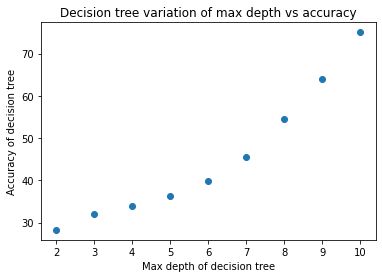

In [11]:
plt.scatter(dt_x, dt_y)
plt.title('Decision tree variation of max depth vs accuracy')
plt.xlabel('Max depth of decision tree')
plt.ylabel('Accuracy of decision tree')
plt.show()